# Combining Weather and Power Outage data

## Imports

In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
# import pytemperature

# Python magic to display matplolib plots in the notebook.
%matplotlib inline

In [2]:
weather_df = pd.read_csv('../Data/weather_data.csv', encoding = 'unicode_escape')
power_df = pd.read_csv('../Data/power_outage.csv')

# Power Outage EDA

###  Power Outage "state" Observation

In [33]:
# Power Outage per State 
state_power_grpby = power_df.groupby("state", as_index=False)["Event Type"].count()
state_power_grpby.sort_values(by='Event Type',ascending=False).head(10)

,state,Event Type
3,California,139
41,Texas,111
46,Washington,72
20,Michigan,47
35,Oregon,44
43,Utah,43
30,New York,43
31,North Carolina,40
40,Tennessee,38
16,Louisiana,35


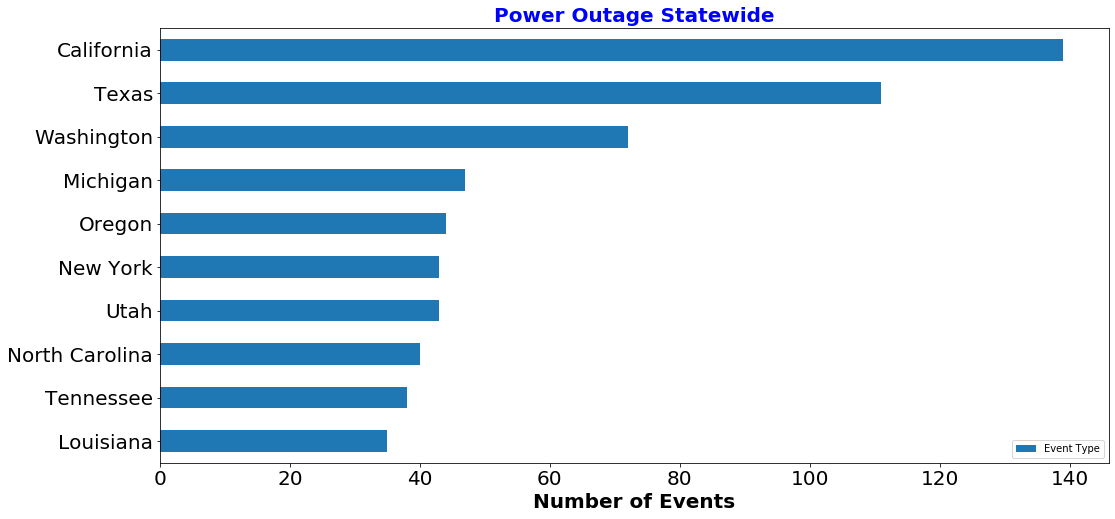

In [34]:
# Power Outage State Observation
state_power_grpby.sort_values(by='Event Type',ascending=True)[40:50].plot('state', kind="barh", figsize=(17, 8), fontsize=20).yaxis.set_label_text("")
plt.title('Power Outage Statewide', fontsize=20, weight='bold', color = 'blue')
plt.xlabel('Number of Events', fontsize=20, weight ='bold');

### Power Outage "Event Type" Observation

In [35]:
# Power Outage Event Type Count
power_event_grpby = power_df.groupby("Event Type", as_index=False)["Number of Customers Affected"].count()
power_event_grpby.sort_values(by='Number of Customers Affected',ascending=False)

,Event Type,Number of Customers Affected
35,Severe Weather,470
60,Vandalism,176
55,System Operations,135
41,Severe Weather - Thunderstorms,51
57,Transmission Interruption,50
...,...,...
8,Earthquake,1
7,Distribution Interruption - Unknown Cause,1
6,Distribution Interruption,1
4,Cyber Event,1


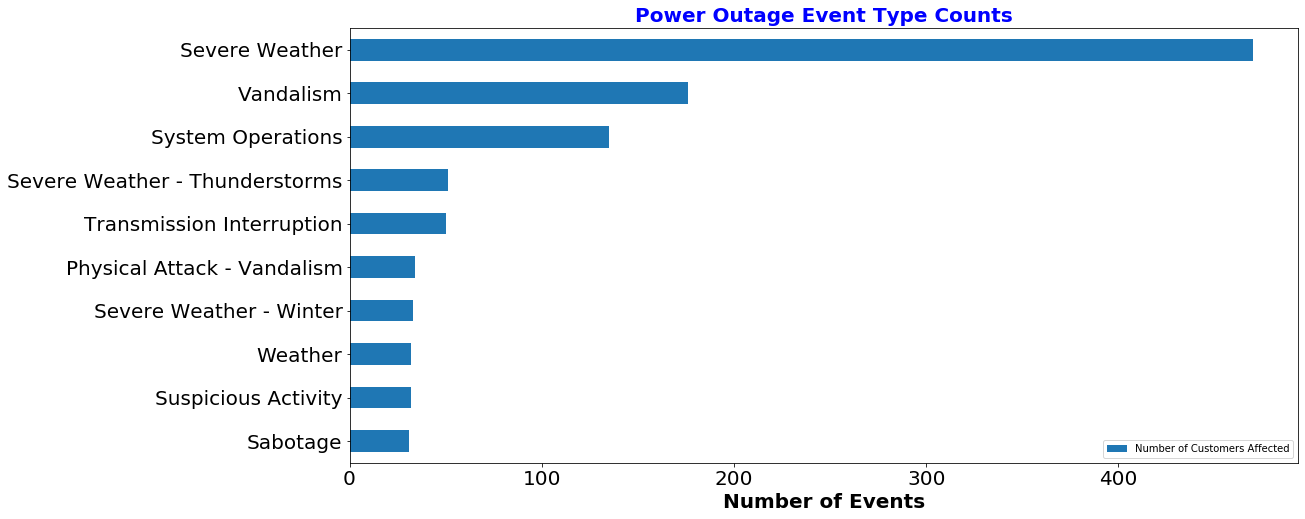

In [36]:
# Power Outage Event Type Observation
power_event_grpby.sort_values(by='Number of Customers Affected',ascending=True)[57:67].plot('Event Type', kind="barh", figsize=(17, 8), fontsize=20).yaxis.set_label_text("")
plt.title('Power Outage Event Type Counts', fontsize=20, weight='bold', color = 'blue')
plt.xlabel('Number of Events', fontsize=20, weight ='bold');

### Power Outage "Yearly" Observation

In [37]:
# Power Outages per year (2014-2019)
years = list(map(lambda x: x.split('-')[0], power_df['Date Event Began']))
power_df['Years'] = years

In [38]:
year_power_grpby = power_df.groupby("Years", as_index=False)["Event Type"].count()
year_power_grpby.sort_values(by='Event Type',ascending=False)

,Years,Event Type
4,2018,297
0,2014,243
5,2019,238
3,2017,199
1,2015,175
2,2016,173


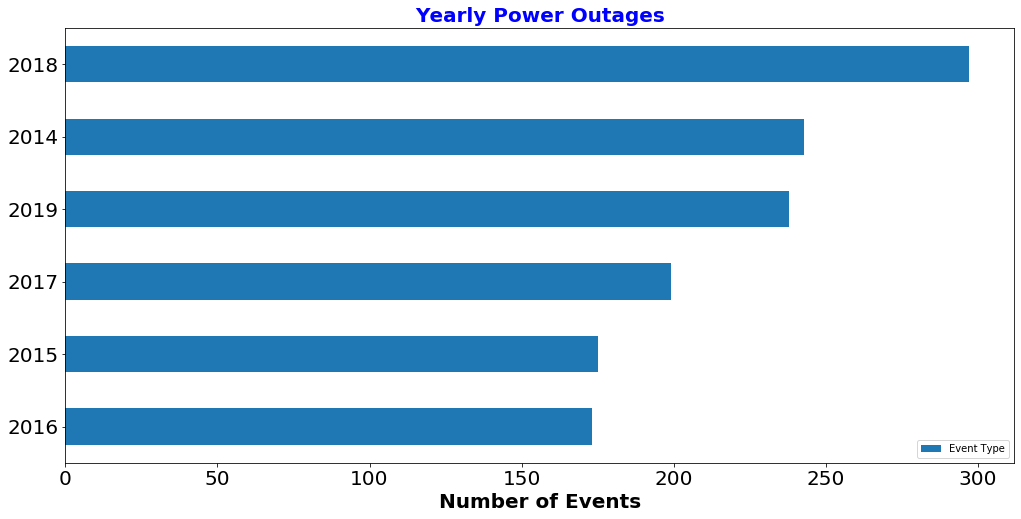

In [39]:
year_power_grpby.sort_values(by='Event Type',ascending=True)[:7].plot('Years', kind="barh", figsize=(17, 8), fontsize=20).yaxis.set_label_text("")
plt.title('Yearly Power Outages', fontsize=20, weight='bold', color = 'blue')
plt.xlabel('Number of Events', fontsize=20, weight='bold');

In [230]:
pd.DataFrame({'Number of Events in Year 2019' : power_df['Event Type'][power_df['Years'] == '2019'].value_counts()}).head(3)

,Number of Events in Year 2019
Severe Weather,78
Vandalism,51
System Operations,41


In [220]:
pd.DataFrame({'Number of Events in California' : power_df['Event Type'][power_df['state'] == 'California'].value_counts()}).head(3)

,Number of Events in California
Vandalism,36
Severe Weather,23
System Operations,17


In [222]:
pd.DataFrame({'Number of Events in Texas' : power_df['Event Type'][power_df['state'] == 'Texas'].value_counts()}).head(3)

,Number of Events in Texas
Severe Weather,48
System Operations,9
Transmission Interruption,6


In [224]:
pd.DataFrame({'Number of Events in Washington' : power_df['Event Type'][power_df['state'] == 'Washington'].value_counts()}).head(3)

,Number of Events in Washington
Severe Weather,22
Vandalism,12
Transmission Interruption,7


In [3]:
weather_df.head()

,Unnamed: 0,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,Time,time_location,EVENT_TYPE,MAGNITUDE,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,0,497009,SOUTHERN SACRAMENTO VALLEY (ZONE),,1/1/14,0,0:00,2014-01-01 0:00:00 | California,Drought,,...,,,,,,,,A plethora of records were set across interior...,January was an abnormally dry and warm month f...,1
1,1,498466,SE KERN CTY DESERT (ZONE),,1/1/14,0,0:00,2014-01-01 0:00:00 | California,Drought,,...,,,,,,,,Unknown,The California drought continued in full force...,2
2,2,498465,INDIAN WELLS VLY (ZONE),,1/1/14,0,0:00,2014-01-01 0:00:00 | California,Drought,,...,,,,,,,,Unknown,The California drought continued in full force...,3
3,3,498464,TULARE CTY MTNS (ZONE),,1/1/14,0,0:00,2014-01-01 0:00:00 | California,Drought,,...,,,,,,,,Unknown,The California drought continued in full force...,4
4,4,498463,S SIERRA MTNS (ZONE),,1/1/14,0,0:00,2014-01-01 0:00:00 | California,Drought,,...,,,,,,,,Unknown,The California drought continued in full force...,5


In [4]:
weather_df.shape

(53718, 40)

In [117]:
weather_df["STATE"].value_counts()

Illinois      9968
New York      9759
Oklahoma      9714
California    8868
Florida       6203
Michigan      5001
Washington    2551
Nevada        1654
Name: STATE, dtype: int64

In [5]:
power_df.head()

,Unnamed: 0,Month,Date Event Began,Time Event Began,Date of Restoration,Time of Restoration,Area Affected,NERC Region,Alert Criteria,Event Type,Demand Loss (MW),Number of Customers Affected,state,Hour Event Began,time_location
0,0,January,2014-01-06,19:50:00,01/06/2014,20:44:00,District of Columbia,RFC,Missing,Voltage Reduction due to Severe Weather - Cold,Unknown,Unknown,District of Columbia,19,2014-01-06 19:00:00 | District of Columbia
1,1,January,2014-01-06,19:50:00,01/06/2014,20:44:00,Unknown,RFC,Missing,Voltage Reduction due to Severe Weather - Cold,Unknown,Unknown,Unknown,19,2014-01-06 19:00:00 | Unknown
2,2,January,2014-01-06,19:52:00,01/06/2014,20:45:00,Delaware,RFC,Missing,Voltage Reduction due to Severe Weather - Cold,Unknown,Unknown,Delaware,19,2014-01-06 19:00:00 | Delaware
3,3,January,2014-01-06,20:45:00,01/07/2014,21:00:00,Unknown,RFC,Missing,Public Appeal due to Severe Weather - Cold,Unknown,Unknown,Unknown,20,2014-01-06 20:00:00 | Unknown
4,4,January,2014-01-06,19:50:00,01/06/2014,20:49:00,Pennsylvania,RFC,Missing,Voltage Reduction due to Severe Weather - Cold,200,62000,Pennsylvania,19,2014-01-06 19:00:00 | Pennsylvania


In [6]:
power_df.shape

(1325, 15)

In [7]:
power_df = power_df.drop(columns=['Unnamed: 0', 'Month', 'Alert Criteria',
                                 'Hour Event Began', 'NERC Region', 'Alert Criteria', 'Area Affected',
                                 'Demand Loss (MW)'])

weather_df = weather_df.drop(columns=['Unnamed: 0', 'CZ_NAME_STR', 'BEGIN_LOCATION', 'BEGIN_TIME', 'Time', 
                                      'TOR_F_SCALE', 'DEATHS_DIRECT', 'INJURIES_DIRECT', 'CZ_TIMEZONE', 
                                      'MAGNITUDE_TYPE', 'EPISODE_ID', 'CZ_TYPE', 'CZ_FIPS', 'WFO', 'INJURIES_INDIRECT',
                                     'DEATHS_INDIRECT', 'SOURCE', 'TOR_WIDTH', 'BEGIN_RANGE', 'BEGIN_AZIMUTH',
                                     'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
                                     'END_LON', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'ABSOLUTE_ROWNUMBER','TOR_LENGTH',
                                     'FLOOD_CAUSE'])

In [8]:
print(weather_df.shape)
print(power_df.shape)

(53718, 8)
(1325, 8)


In [9]:
weather_df['MAGNITUDE'] = weather_df['MAGNITUDE'].apply(lambda x: 0.0 if x == ' ' else x)

In [10]:
weather_df['MAGNITUDE'] = weather_df['MAGNITUDE'].astype('float')

## Merge the two dataframes

In [11]:
weather_df['date_state'] = [f"{post.split('|')[0].split()[0]} | {weather_df['STATE'][i]}" 
 for i, post in enumerate(weather_df['time_location'])]

In [12]:
power_df['date_state'] = [f"{post.split('|')[0].split()[0]} | {power_df['state'][i]}" 
 for i, post in enumerate(power_df['time_location'])]

In [13]:
df = pd.merge(weather_df, power_df, on='date_state', how='inner')

In [14]:
df.head()

,EVENT_ID,BEGIN_DATE,time_location_x,EVENT_TYPE,MAGNITUDE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE,date_state,Date Event Began,Time Event Began,Date of Restoration,Time of Restoration,Event Type,Number of Customers Affected,state,time_location_y
0,509986,2/6/14,2014-02-06 4:00:00 | California,Winter Weather,0.0,0,0,California,2014-02-06 | California,2014-02-06,13:00:00,02/06/2014,22:00:00,Fuel Supply Emergency - Natural Gas,Unknown,California,2014-02-06 13:00:00 | California
1,509986,2/6/14,2014-02-06 4:00:00 | California,Winter Weather,0.0,0,0,California,2014-02-06 | California,2014-02-06,13:05:00,02/06/2014,19:15:00,Fuel Supply Emergency - Natural Gas,Unknown,California,2014-02-06 13:00:00 | California
2,509986,2/6/14,2014-02-06 4:00:00 | California,Winter Weather,0.0,0,0,California,2014-02-06 | California,2014-02-06,14:15:00,02/06/2014,19:39:00,Fuel Supply Emergency - Natural Gas,Unknown,California,2014-02-06 14:00:00 | California
3,509987,2/6/14,2014-02-06 4:00:00 | California,Winter Weather,0.0,0,0,California,2014-02-06 | California,2014-02-06,13:00:00,02/06/2014,22:00:00,Fuel Supply Emergency - Natural Gas,Unknown,California,2014-02-06 13:00:00 | California
4,509987,2/6/14,2014-02-06 4:00:00 | California,Winter Weather,0.0,0,0,California,2014-02-06 | California,2014-02-06,13:05:00,02/06/2014,19:15:00,Fuel Supply Emergency - Natural Gas,Unknown,California,2014-02-06 13:00:00 | California


In [15]:
df.shape

(6986, 17)

In [16]:
weather_df.head()

,EVENT_ID,BEGIN_DATE,time_location,EVENT_TYPE,MAGNITUDE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE,date_state
0,497009,1/1/14,2014-01-01 0:00:00 | California,Drought,0.0,0,0,California,2014-01-01 | California
1,498466,1/1/14,2014-01-01 0:00:00 | California,Drought,0.0,0,0,California,2014-01-01 | California
2,498465,1/1/14,2014-01-01 0:00:00 | California,Drought,0.0,0,0,California,2014-01-01 | California
3,498464,1/1/14,2014-01-01 0:00:00 | California,Drought,0.0,0,0,California,2014-01-01 | California
4,498463,1/1/14,2014-01-01 0:00:00 | California,Drought,0.0,0,0,California,2014-01-01 | California


In [17]:
power_df.head()

,Date Event Began,Time Event Began,Date of Restoration,Time of Restoration,Event Type,Number of Customers Affected,state,time_location,date_state
0,2014-01-06,19:50:00,01/06/2014,20:44:00,Voltage Reduction due to Severe Weather - Cold,Unknown,District of Columbia,2014-01-06 19:00:00 | District of Columbia,2014-01-06 | District of Columbia
1,2014-01-06,19:50:00,01/06/2014,20:44:00,Voltage Reduction due to Severe Weather - Cold,Unknown,Unknown,2014-01-06 19:00:00 | Unknown,2014-01-06 | Unknown
2,2014-01-06,19:52:00,01/06/2014,20:45:00,Voltage Reduction due to Severe Weather - Cold,Unknown,Delaware,2014-01-06 19:00:00 | Delaware,2014-01-06 | Delaware
3,2014-01-06,20:45:00,01/07/2014,21:00:00,Public Appeal due to Severe Weather - Cold,Unknown,Unknown,2014-01-06 20:00:00 | Unknown,2014-01-06 | Unknown
4,2014-01-06,19:50:00,01/06/2014,20:49:00,Voltage Reduction due to Severe Weather - Cold,62000,Pennsylvania,2014-01-06 19:00:00 | Pennsylvania,2014-01-06 | Pennsylvania


In [18]:
df.isnull().sum()

EVENT_ID                        0
BEGIN_DATE                      0
time_location_x                 0
EVENT_TYPE                      0
MAGNITUDE                       0
DAMAGE_PROPERTY_NUM             0
DAMAGE_CROPS_NUM                0
STATE                           0
date_state                      0
Date Event Began                0
Time Event Began                0
Date of Restoration             0
Time of Restoration             0
Event Type                      0
Number of Customers Affected    0
state                           0
time_location_y                 0
dtype: int64

In [19]:
# remove duplicates
df = df.drop_duplicates(subset=['EVENT_ID', 'state', 'date_state'], keep='last').reset_index(drop=True)

In [22]:
df = df.drop(columns=['STATE'])

In [63]:
df.shape

(5205, 16)

In [23]:
severe_weather_df = df[(df['Event Type'] == 'Severe Weather- High Winds') | (df['Event Type'] == 'Severe Weather - Wind') | 
  (df['Event Type'] == 'Severe Weather - Snow/Ice') | (df['Event Type'] == 'Severe Weather - Thunderstorms') | (df['Event Type'] == 'Severe Weather')
  | (df['Event Type'] == 'Severe Weather/Transmission Interruption') | (df['Event Type'] == 'Severe Weather - Thunderstorms') | (df['Event Type'] == 'Weather')]

In [24]:
severe_weather_df = severe_weather_df.drop(columns=['Event Type'])

In [25]:
severe_weather_df['EVENT_TYPE'].value_counts()

Thunderstorm Wind          1485
High Wind                   595
Flood                       333
Hail                        326
Strong Wind                 285
Tropical Storm              165
Flash Flood                 160
Heavy Snow                  157
Winter Storm                 96
Tornado                      92
Blizzard                     65
Heavy Rain                   60
Debris Flow                  54
Winter Weather               52
Hurricane                    40
Storm Surge/Tide             37
Lightning                    33
Excessive Heat               29
Ice Storm                    20
Wildfire                     19
Cold/Wind Chill              16
Funnel Cloud                 12
Tropical Depression          12
Dust Storm                   11
Dense Fog                    11
Extreme Cold/Wind Chill      11
Coastal Flood                10
Heat                         10
Hurricane (Typhoon)           8
Lake-Effect Snow              6
High Surf                     6
Frost/Fr

In [66]:
severe_weather_df.head()

,EVENT_ID,BEGIN_DATE,time_location_x,EVENT_TYPE,MAGNITUDE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,date_state,Date Event Began,Time Event Began,Date of Restoration,Time of Restoration,Number of Customers Affected,state,time_location_y,Years
40,553865,12/11/14,2014-12-11 0:00:00 | California,Heavy Snow,0.0,0,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014
41,553856,12/11/14,2014-12-11 0:00:00 | California,Debris Flow,0.0,300000,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014
42,553867,12/11/14,2014-12-11 0:00:00 | California,Heavy Snow,0.0,0,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014
43,547263,12/11/14,2014-12-11 2:00:00 | California,Flood,0.0,0,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014
44,545085,12/11/14,2014-12-11 3:00:00 | California,High Wind,83.0,0,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014


# Weather_Outage EDA

### Weather_Outage "state" Observation

In [26]:
# Weather_Outage State 
state_grpby = severe_weather_df.groupby("state", as_index=False)["EVENT_TYPE"].count()
state_grpby.sort_values(by='EVENT_TYPE',ascending=False)

,state,EVENT_TYPE
3,Michigan,1043
0,California,989
5,New York,612
1,Florida,570
2,Illinois,541
6,Oklahoma,247
7,Washington,225
4,Nevada,2


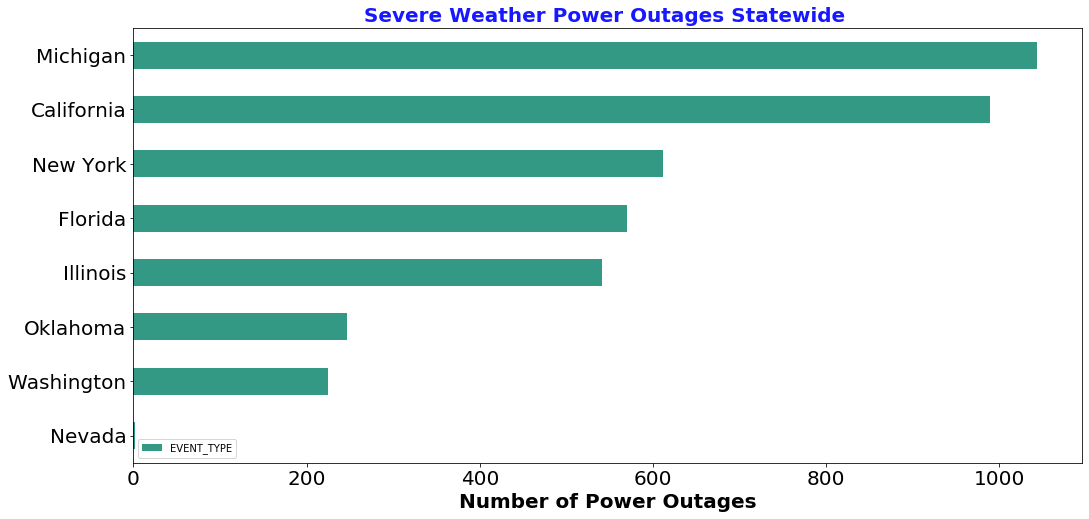

In [113]:
# Weather_outage State Observation
state_grpby.sort_values(by='EVENT_TYPE',ascending=True)[:9].plot('state', kind="barh", figsize=(17, 8), cmap = 'summer', fontsize=20, alpha = 0.8).yaxis.set_label_text("")
plt.title('Severe Weather Power Outages Statewide ', fontsize=20, weight='bold', color = 'blue', alpha = .9)
plt.xlabel('Number of Power Outages', fontsize=20, weight ='bold');

In [234]:
pd.DataFrame({'Number of Events in New York' : severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'New York'].value_counts()}).head(3)

,Number of Events in New York
Thunderstorm Wind,415
High Wind,86
Hail,42


### Weather_Outage "EVENT_TYPE" Observation

In [28]:
# Severe Weather Event Type Count
event_grpby = severe_weather_df.groupby("EVENT_TYPE", as_index=False)["MAGNITUDE"].count()
event_grpby.sort_values(by='MAGNITUDE',ascending=False).head(10)

,EVENT_TYPE,MAGNITUDE
29,Thunderstorm Wind,1485
19,High Wind,595
11,Flood,333
14,Hail,326
28,Strong Wind,285
32,Tropical Storm,165
10,Flash Flood,160
17,Heavy Snow,157
34,Winter Storm,96
30,Tornado,92


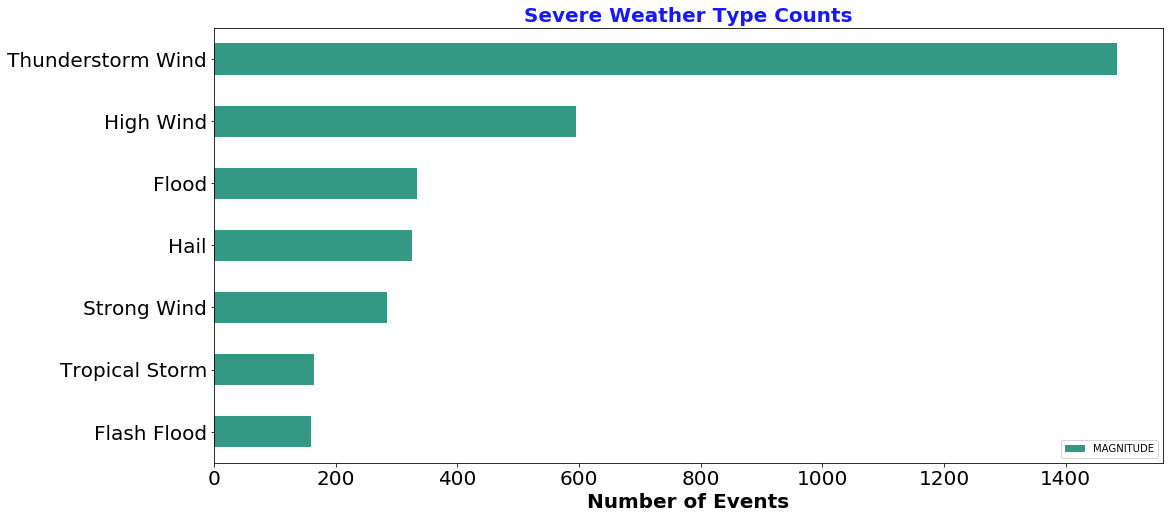

In [114]:
event_grpby.sort_values(by='MAGNITUDE',ascending=True)[29:40].plot('EVENT_TYPE', kind="barh", cmap = 'summer', alpha = 0.8, figsize=(17, 8), fontsize=20).yaxis.set_label_text("")
plt.title('Severe Weather Type Counts', fontsize=20, weight='bold', color = 'blue', alpha = .9)
plt.xlabel('Number of Events', fontsize=20, weight='bold');

### Weather_Outage "Yearly" Observation

In [30]:
# severe weather power outages per year
years = list(map(lambda x: x.split('-')[0], severe_weather_df['Date Event Began']))
severe_weather_df['Years'] = years

In [31]:
year_grpby = severe_weather_df.groupby("Years", as_index=False)["EVENT_TYPE"].count()
year_grpby.sort_values(by='EVENT_TYPE',ascending=False)

,Years,EVENT_TYPE
0,2014,1073
5,2019,810
4,2018,773
3,2017,723
1,2015,498
2,2016,352


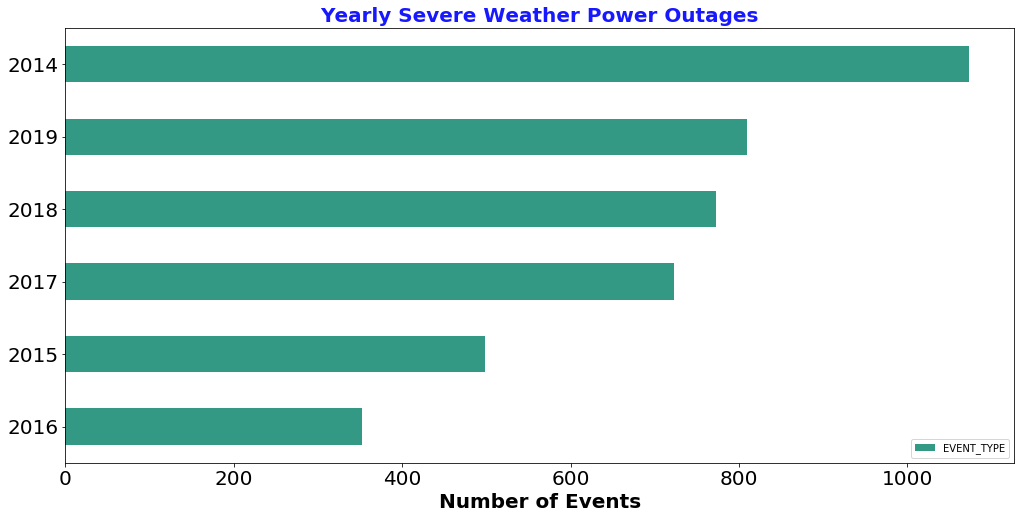

In [115]:
year_grpby.sort_values(by='EVENT_TYPE',ascending=True)[:7].plot('Years', kind="barh", cmap = 'summer', alpha = 0.8, figsize=(17, 8), fontsize=20).yaxis.set_label_text("")
plt.title('Yearly Severe Weather Power Outages', fontsize=20, weight='bold', color = 'blue', alpha = 0.9)
plt.xlabel('Number of Events', fontsize=20, weight='bold');

In [40]:
# days = list(map(lambda x: x.split('-')[-2]+'-'+x.split('-')[-1], severe_weather_df['Date Event Began']))

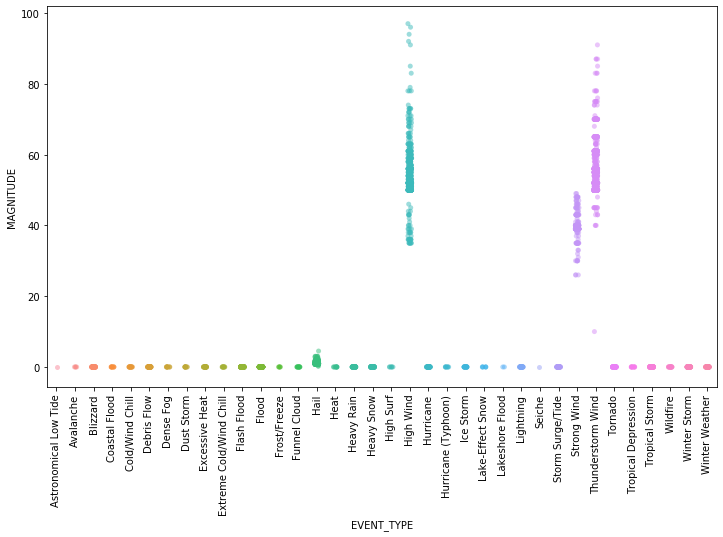

In [44]:
plt.figure(figsize=(12,7))
sns.stripplot(x = severe_weather_df['EVENT_TYPE'], y = severe_weather_df['MAGNITUDE'],
              order = np.sort(severe_weather_df['EVENT_TYPE'].unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=90);

In [122]:
severe_weather_df.head()

,EVENT_ID,BEGIN_DATE,time_location_x,EVENT_TYPE,MAGNITUDE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,date_state,Date Event Began,Time Event Began,Date of Restoration,Time of Restoration,Number of Customers Affected,state,time_location_y,Years
40,553865,12/11/14,2014-12-11 0:00:00 | California,Heavy Snow,0.0,0,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014
41,553856,12/11/14,2014-12-11 0:00:00 | California,Debris Flow,0.0,300000,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014
42,553867,12/11/14,2014-12-11 0:00:00 | California,Heavy Snow,0.0,0,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014
43,547263,12/11/14,2014-12-11 2:00:00 | California,Flood,0.0,0,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014
44,545085,12/11/14,2014-12-11 3:00:00 | California,High Wind,83.0,0,0,2014-12-11 | California,2014-12-11,23:15:00,Unknown,Unknown,Unknown,California,2014-12-11 23:00:00 | California,2014


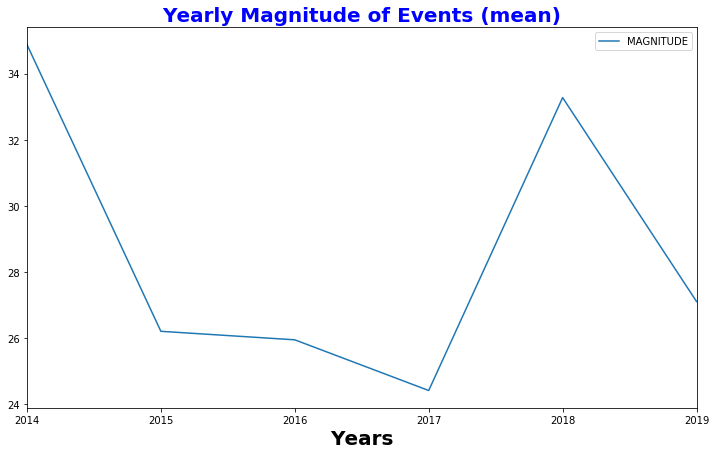

In [53]:
# Yearly Magnitude of Sever Weather Events for Power Outages
severe_weather_df[['Years','MAGNITUDE']].groupby(['Years'], as_index=True).mean().plot(figsize=(12,7))
plt.title('Yearly Magnitude of Events (mean)', fontsize=20, weight='bold', color = 'blue');
plt.xlabel('Years', fontsize=20, weight='bold');

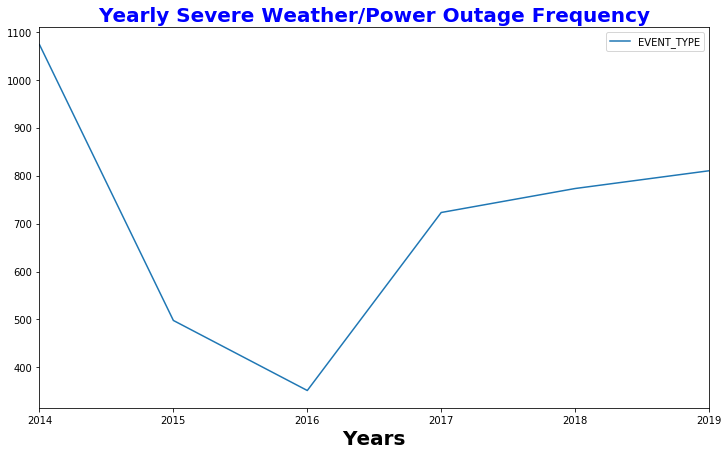

In [124]:
severe_weather_df[['Years','EVENT_TYPE']].groupby(['Years'], as_index=True).count().plot(figsize=(12,7))
plt.title('Yearly Severe Weather/Power Outage Frequency', fontsize=20, weight='bold', color = 'blue');
plt.xlabel('Years', fontsize=20, weight='bold');

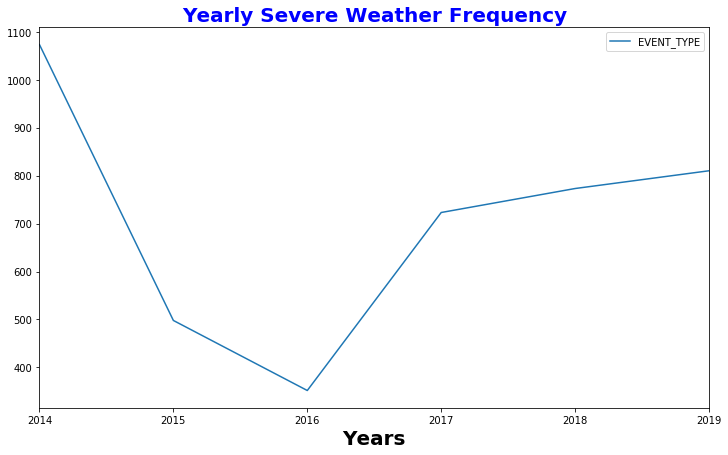

In [130]:
severe_weather_df[['Years','EVENT_TYPE']].groupby(['Years'], as_index=True).count().plot(figsize=(12,7))
plt.title('Yearly Severe Weather Frequency', fontsize=20, weight='bold', color = 'blue');
plt.xlabel('Years', fontsize=20, weight='bold');

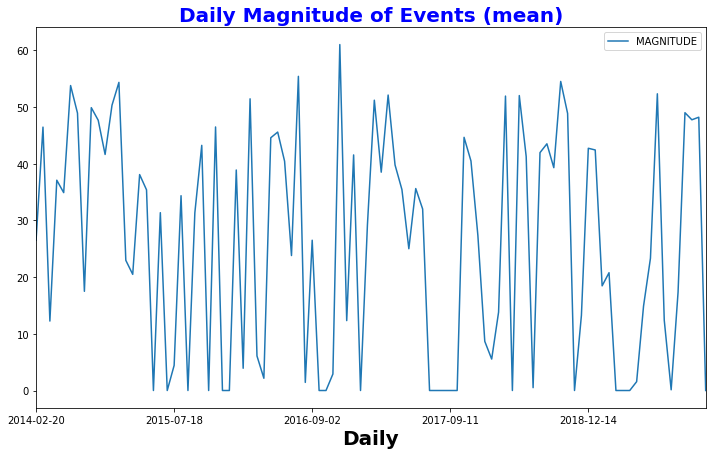

In [54]:
# Daily Mean Magnitude of Sever Weather Events for Power Outages
severe_weather_df[['Date Event Began','MAGNITUDE']].groupby(['Date Event Began'], as_index=True).mean().plot(figsize=(12,7))
plt.title('Daily Magnitude of Events (mean)', fontsize=20, weight='bold', color = 'blue');
plt.xlabel('Daily', fontsize=20, weight='bold');

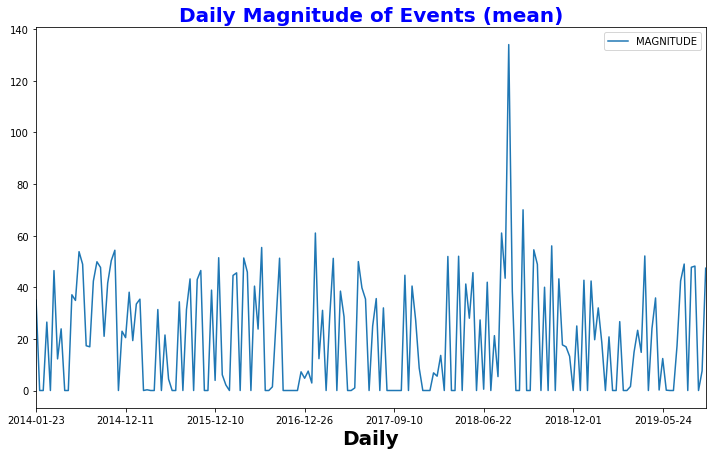

In [55]:
# Daily Mean Magnitude of all kinds of Power Outage Events
df[['Date Event Began','MAGNITUDE']].groupby(['Date Event Began'], as_index=True).mean().plot(figsize=(12,7))
plt.title('Daily Magnitude of Events (mean)', fontsize=20, weight='bold', color = 'blue');
plt.xlabel('Daily', fontsize=20, weight='bold');

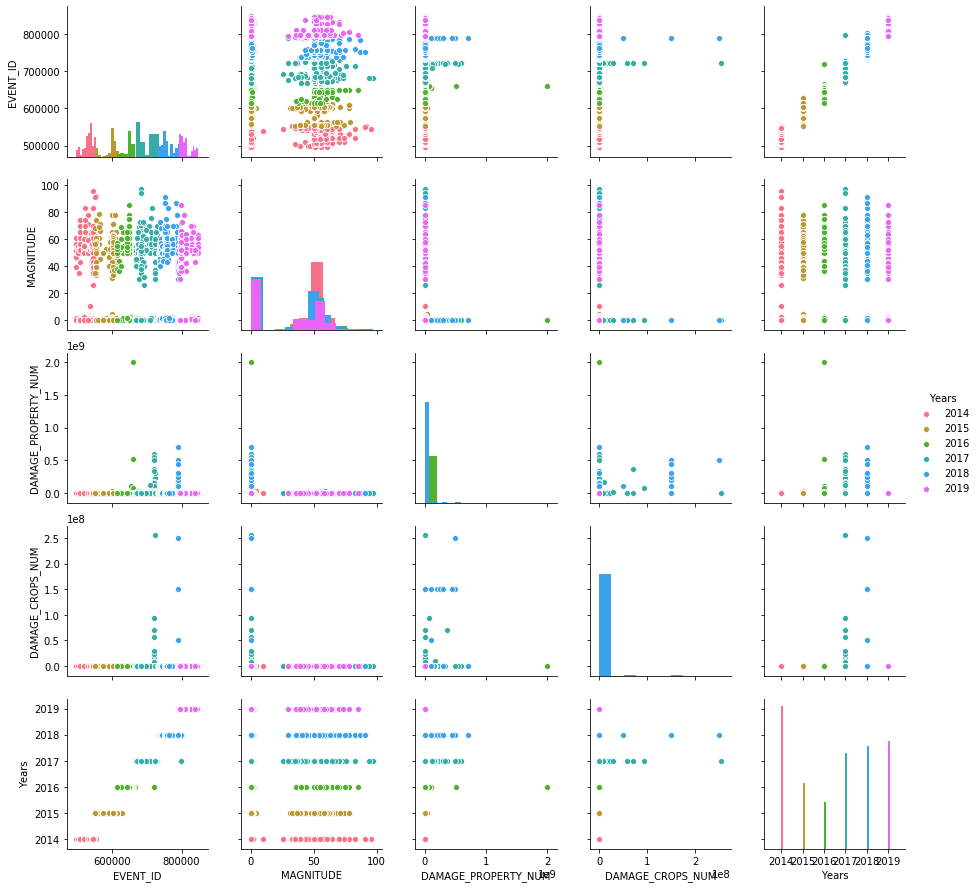

In [60]:
# pairplot for severe weather per year (2014-2019)
sns.pairplot(severe_weather_df, diag_kind='hist', hue= 'Years',palette="husl");

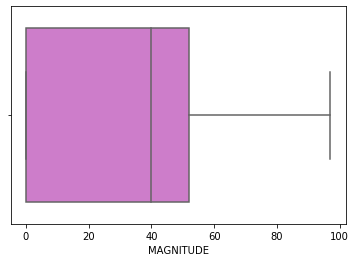

In [62]:
# boxplot for the Magnitude of Severe Weather Events
sns.boxplot(severe_weather_df['MAGNITUDE'], color = 'orchid')

In [67]:
# Export to CSV
severe_weather_df.to_csv("../Data/weather_power_outage.csv")

In [68]:
severe_weather_df.shape

(4229, 16)

In [174]:
severe_weather_df['EVENT_TYPE'].value_counts()

Thunderstorm Wind          1485
High Wind                   595
Flood                       333
Hail                        326
Strong Wind                 285
Tropical Storm              165
Flash Flood                 160
Heavy Snow                  157
Winter Storm                 96
Tornado                      92
Blizzard                     65
Heavy Rain                   60
Debris Flow                  54
Winter Weather               52
Hurricane                    40
Storm Surge/Tide             37
Lightning                    33
Excessive Heat               29
Ice Storm                    20
Wildfire                     19
Cold/Wind Chill              16
Funnel Cloud                 12
Tropical Depression          12
Dust Storm                   11
Dense Fog                    11
Extreme Cold/Wind Chill      11
Coastal Flood                10
Heat                         10
Hurricane (Typhoon)           8
Lake-Effect Snow              6
High Surf                     6
Frost/Fr

In [190]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'California'].count()

989

In [180]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'California'].value_counts()

Flood                220
Strong Wind          213
High Wind            164
Heavy Snow           108
Flash Flood           60
Debris Flow           53
Heavy Rain            52
Winter Weather        19
Wildfire              16
Lightning             13
Excessive Heat        12
Hail                  11
Thunderstorm Wind     11
Dense Fog             10
Winter Storm           7
Frost/Freeze           5
Tornado                3
High Surf              3
Blizzard               3
Funnel Cloud           2
Dust Storm             2
Coastal Flood          1
Avalanche              1
Name: EVENT_TYPE, dtype: int64

In [220]:
pd.DataFrame({'Number of Events in California' : power_df['Event Type'][power_df['state'] == 'California'].value_counts()}).head(3)

,Number of Events in California
Vandalism,36
Severe Weather,23
System Operations,17


In [222]:
pd.DataFrame({'Number of Events in Texas' : power_df['Event Type'][power_df['state'] == 'Texas'].value_counts()}).head(3)

,Number of Events in Texas
Severe Weather,48
System Operations,9
Transmission Interruption,6


In [224]:
pd.DataFrame({'Number of Events in Washington' : power_df['Event Type'][power_df['state'] == 'Washington'].value_counts()}).head(3)

,Number of Events in Washington
Severe Weather,22
Vandalism,12
Transmission Interruption,7


### Event Type Counts for the State of Florida

In [181]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'Florida'].value_counts()

Tropical Storm         165
Thunderstorm Wind      147
Flash Flood             50
Hurricane               40
Flood                   37
Storm Surge/Tide        37
Tornado                 35
Hail                    20
Tropical Depression     12
Hurricane (Typhoon)      8
Lightning                5
Funnel Cloud             4
Coastal Flood            4
High Surf                3
Strong Wind              2
Heavy Rain               1
Name: EVENT_TYPE, dtype: int64

### Event Type Counts for the State of Michigan

In [182]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'Michigan'].value_counts()

Thunderstorm Wind          511
Hail                       217
High Wind                  135
Winter Storm                46
Blizzard                    39
Winter Weather              27
Heavy Snow                  15
Tornado                      9
Flood                        8
Extreme Cold/Wind Chill      8
Strong Wind                  7
Lightning                    7
Lake-Effect Snow             6
Flash Flood                  3
Lakeshore Flood              2
Heavy Rain                   2
Seiche                       1
Name: EVENT_TYPE, dtype: int64

### Event Type Counts for the State of New York

In [183]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'New York'].value_counts()

Thunderstorm Wind    415
High Wind             86
Hail                  42
Winter Storm          27
Tornado               10
Heavy Snow             8
Coastal Flood          5
Strong Wind            4
Excessive Heat         3
Blizzard               3
Flash Flood            3
Winter Weather         3
Funnel Cloud           2
Flood                  1
Name: EVENT_TYPE, dtype: int64

### Event Type Counts for the State of Oklahoma

In [184]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'Oklahoma'].value_counts()

Thunderstorm Wind    92
High Wind            55
Flood                47
Ice Storm            20
Flash Flood          12
Hail                  9
Winter Storm          5
Tornado               4
Heavy Snow            1
Wildfire              1
Lightning             1
Name: EVENT_TYPE, dtype: int64

### Event Type Counts for the State of Washington

In [185]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'Washington'].value_counts()

High Wind                143
Heavy Snow                24
Strong Wind               21
Dust Storm                 9
Flood                      8
Thunderstorm Wind          5
Winter Weather             3
Avalanche                  3
Flash Flood                2
Wildfire                   2
Hail                       2
Astronomical Low Tide      1
Debris Flow                1
Heavy Rain                 1
Name: EVENT_TYPE, dtype: int64

### Event Type Counts for the State of Illinois

In [187]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'Illinois'].value_counts()

Thunderstorm Wind          303
Strong Wind                 38
Tornado                     31
Flash Flood                 29
Hail                        25
Blizzard                    20
Cold/Wind Chill             16
Excessive Heat              14
High Wind                   12
Flood                       12
Winter Storm                11
Heat                        10
Lightning                    7
Heavy Rain                   4
Funnel Cloud                 4
Extreme Cold/Wind Chill      3
Heavy Snow                   1
Dense Fog                    1
Name: EVENT_TYPE, dtype: int64

### Event Type Counts for the State of Nevada

In [188]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['state'] == 'Nevada'].value_counts()

Flash Flood          1
Thunderstorm Wind    1
Name: EVENT_TYPE, dtype: int64

### Event Type Counts for the Year 2014

In [191]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2014'].value_counts()

Thunderstorm Wind    544
Hail                 135
Strong Wind           87
High Wind             83
Flash Flood           65
Flood                 46
Tornado               36
Heavy Rain            15
Lightning             12
Winter Weather        12
Heat                  10
Heavy Snow            10
Funnel Cloud           4
Debris Flow            4
Winter Storm           4
Excessive Heat         2
Lake-Effect Snow       2
Coastal Flood          1
Dense Fog              1
Name: EVENT_TYPE, dtype: int64

In [192]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2014'].count()

1073

### Event Type Counts for the Year 2015

In [193]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2015'].value_counts()

High Wind            99
Thunderstorm Wind    97
Flood                69
Strong Wind          55
Hail                 51
Flash Flood          32
Ice Storm            20
Heavy Snow           18
Lightning            14
Dust Storm           11
Dense Fog             8
Heavy Rain            5
Winter Storm          5
Wildfire              4
Lake-Effect Snow      4
Debris Flow           2
Tornado               2
Winter Weather        1
High Surf             1
Name: EVENT_TYPE, dtype: int64

In [194]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2015'].count()

498

### Event Type Counts for the Year 2016

In [204]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2016'].value_counts()

Thunderstorm Wind      139
Tropical Storm          74
Hail                    46
Storm Surge/Tide        16
High Wind               14
Flood                   13
Tropical Depression     12
Hurricane (Typhoon)      8
Tornado                  7
Strong Wind              5
Lightning                4
Hurricane                3
High Surf                3
Flash Flood              3
Coastal Flood            1
Funnel Cloud             1
Winter Weather           1
Heavy Rain               1
Heavy Snow               1
Name: EVENT_TYPE, dtype: int64

In [205]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2016'].count()

352

### Event Type Counts for the Year 2017

In [195]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2017'].value_counts()

Thunderstorm Wind    157
High Wind            154
Tropical Storm        77
Flood                 71
Flash Flood           43
Hail                  38
Heavy Snow            26
Tornado               24
Hurricane             23
Strong Wind           19
Debris Flow           17
Storm Surge/Tide      13
Wildfire              13
Excessive Heat        12
Winter Weather         9
Heavy Rain             9
Frost/Freeze           5
Coastal Flood          3
Winter Storm           2
Funnel Cloud           2
Blizzard               2
High Surf              2
Lightning              1
Avalanche              1
Name: EVENT_TYPE, dtype: int64

In [196]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2017'].count()

723

### Event Type Counts for the Year 2018

In [197]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2018'].value_counts()

Thunderstorm Wind        346
High Wind                105
Winter Storm              58
Heavy Snow                52
Hail                      41
Strong Wind               34
Blizzard                  24
Tornado                   16
Flood                     15
Tropical Storm            14
Hurricane                 14
Winter Weather            13
Excessive Heat            12
Storm Surge/Tide           8
Flash Flood                7
Coastal Flood              5
Heavy Rain                 3
Lakeshore Flood            2
Funnel Cloud               2
Wildfire                   1
Astronomical Low Tide      1
Name: EVENT_TYPE, dtype: int64

In [198]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2018'].count()

773

### Event Types count for the Year 2019

In [199]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2019'].value_counts()

Thunderstorm Wind          202
High Wind                  140
Flood                      119
Strong Wind                 85
Heavy Snow                  50
Blizzard                    39
Debris Flow                 31
Winter Storm                27
Heavy Rain                  27
Cold/Wind Chill             16
Winter Weather              16
Hail                        15
Extreme Cold/Wind Chill     11
Flash Flood                 10
Tornado                      7
Excessive Heat               3
Funnel Cloud                 3
Avalanche                    3
Lightning                    2
Dense Fog                    2
Wildfire                     1
Seiche                       1
Name: EVENT_TYPE, dtype: int64

In [201]:
severe_weather_df['EVENT_TYPE'][severe_weather_df['Years'] == '2019'].count()

810